## **CASO 8: CLASIFICACIÓN SEGURIDAD CIBERNÉTICA**

Usted trabaja para una organización en el equipo de seguridad cibernética y cuenta con los registros de transacciones dadas en diferentes momentos. Usted quiere revisar si dichas transacciones son normales o son ataques, para lo cual decide construir un experimento de clasificación. Cuenta con 8.866 transacciones con diferentes columnas. Identifique el modelo que mejor ajuste los datos con la mejor matriz de confusión y un f1 score superior al 80%.

## Metodología ASUM-DM

1. **Entendimiento del Negocio:** La organización de seguridad cibernética busca clasificar la procedencia de las transacciones entre normales o ataques.

2. **Enfoque Analítico:** Diseñar un experimento que permita clasificar los registros de transacciones

3. **Requerimiento de Datos:** Registro de transacciones de la organización

4. **Recolección de Datos**

5. **Entendimiento de Datos:**
    - Identificar datos nulos
    - Exploración univariada de los datos 
    - Exploración multivariada de los datos
    - Identificación de correlación y multicolinealidad

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../data/datos_caso_8.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8866 entries, 0 to 8865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Timestamp       8866 non-null   object
 1   Source_IP       8866 non-null   object
 2   Destination_IP  8866 non-null   object
 3   Port            8866 non-null   int64 
 4   Request_Type    8866 non-null   object
 5   Protocol        8866 non-null   object
 6   Payload_Size    8866 non-null   int64 
 7   User_Agent      8866 non-null   object
 8   Status          8866 non-null   object
 9   Intrusion       8866 non-null   int64 
 10  Scan_Type       8866 non-null   object
dtypes: int64(3), object(8)
memory usage: 762.1+ KB


In [4]:
data

,Timestamp,Source_IP,Destination_IP,Port,Request_Type,Protocol,Payload_Size,User_Agent,Status,Intrusion,Scan_Type
0,2025-06-06 06:04:08,192.168.54.167,220.159.139.17,443,SSH,ICMP,2954,Mozilla/5.0,Success,0,Normal
1,2025-06-04 15:20:59,192.168.193.254,201.83.205.167,80,FTP,UDP,206,Wget/1.20.3,Success,0,Normal
2,2025-06-03 07:23:49,192.168.91.17,211.0.177.164,21,SSH,ICMP,977,nmap/7.80,Success,0,Normal
3,2025-06-03 11:35:42,192.168.108.75,187.49.21.67,22,HTTP,TCP,521,curl/7.68.0,Success,0,Normal
4,2025-06-05 06:09:02,192.168.245.254,189.62.16.12,53,Telnet,TCP,251,Wget/1.20.3,Success,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...
8861,2025-06-04 22:16:23,166.225.57.211,202.34.154.193,135,DNS,ICMP,1391,Nikto/2.1.6,Failure,1,BotAttack
8862,2025-06-05 14:43:42,192.168.255.79,2.236.94.56,21,SSH,TCP,2272,curl/7.68.0,Success,0,Normal
8863,2025-06-01 23:27:15,192.168.174.115,206.61.199.249,22,SSH,TCP,2753,python-requests/2.25.1,Success,0,Normal
8864,2025-06-01 00:26:36,192.168.68.65,7.132.69.36,443,DNS,TCP,2792,nmap/7.80,Success,0,Normal


### Identificación de Datos Nulos

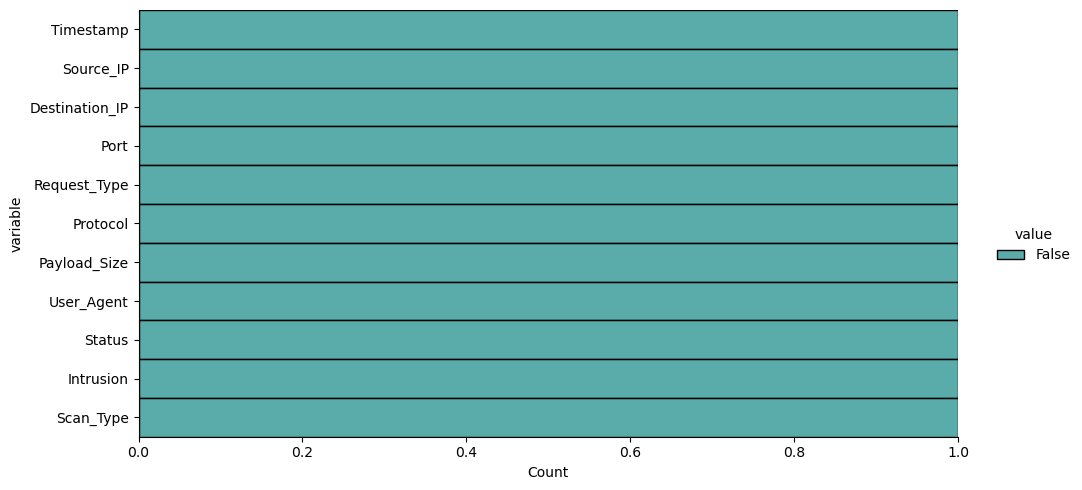

In [10]:
data.isnull().melt().pipe(lambda df: sns.displot(data=df, y = 'variable', palette='viridis', hue='value', multiple='fill', aspect=2))
plt.show()

### Exploración Univariada de los Datos

#### HISTOGRAMAS DE FRECUENCIA

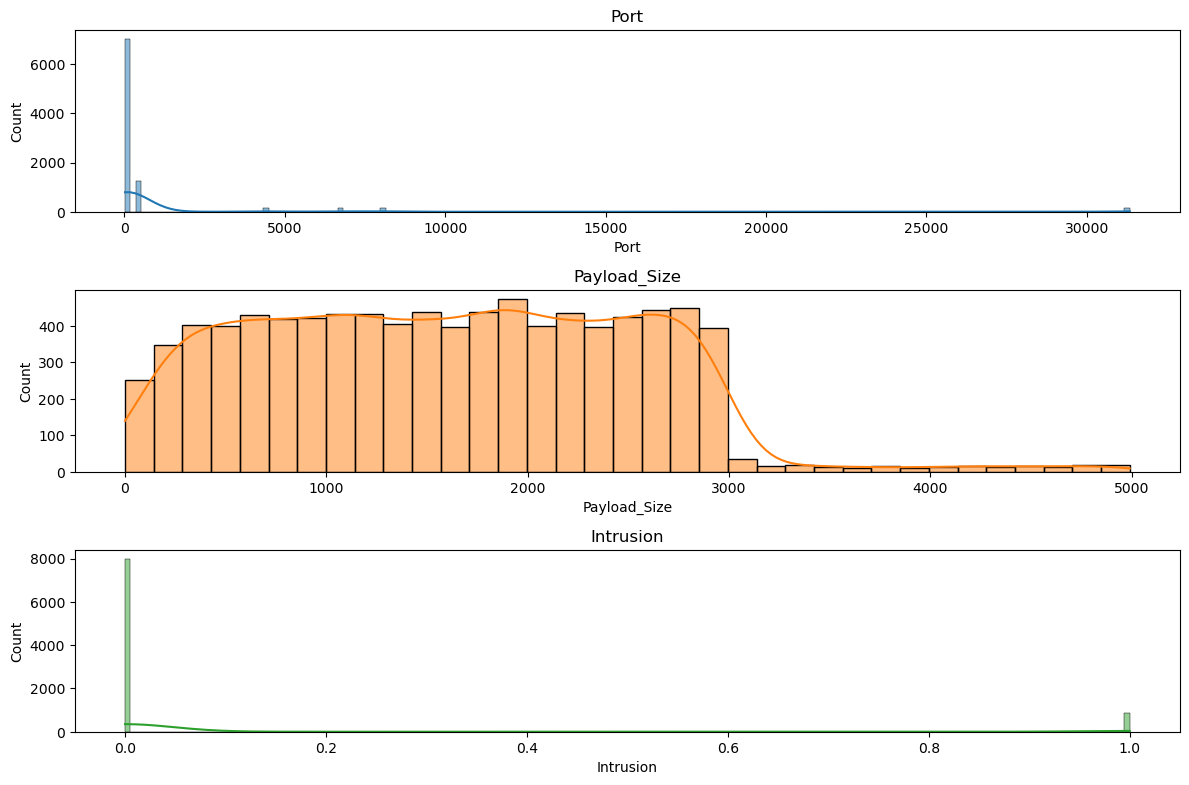

In [11]:
fig, ax = plt.subplots(3, 1, figsize=(12, 8))
ax = ax.flat
num_col = data.select_dtypes(include=['int64', 'float64']).columns # SOLO VAMOS A GRAFICAR VARIABLES NUMÉRICAS
for i, col in enumerate(num_col):
    sns.histplot(
        data = data,
        x = col,
        kde = True,
        color = (list(plt.rcParams['axes.prop_cycle']) * 7)[i]['color'],
        ax = ax[i]
    )
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

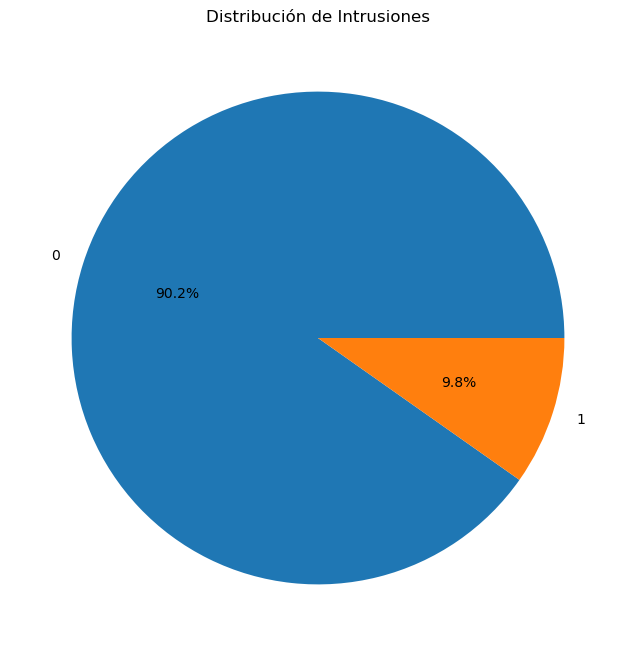

In [117]:
plt.figure(figsize=(12, 8))
plt.pie(data["Intrusion"].value_counts(), labels=data["Intrusion"].value_counts().index, autopct='%1.1f%%')
plt.title("Distribución de Intrusiones")
plt.show()

#### GRÁFICOS DE TORTA

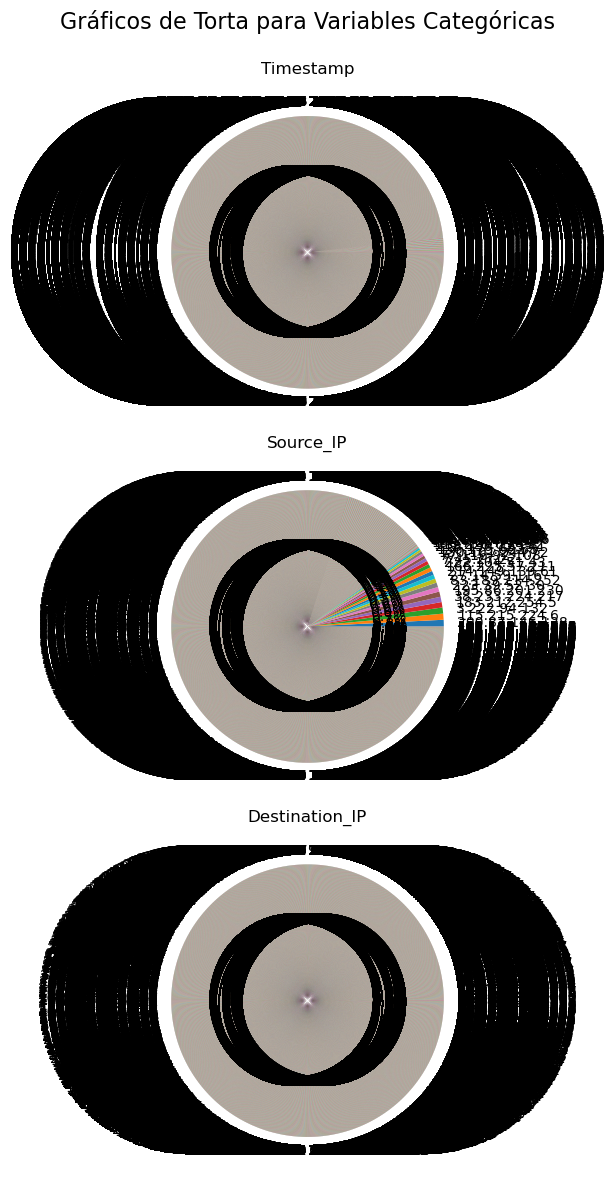

In [12]:
fig, ax = plt.subplots(3, 1, figsize=(12, 12))
ax = ax.flat
cat_col = data.select_dtypes(include='object').columns
cat_col = cat_col.drop(['Request_Type', 'Protocol', 'User_Agent', 'Status', 'Scan_Type'])
for i, col in enumerate(cat_col):
    ax[i].pie(x = data[col].value_counts(),
           labels = data[col].value_counts().index,
           autopct = '%.1f%%')
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top=0.92)
fig.suptitle('Gráficos de Torta para Variables Categóricas', fontsize=16)
plt.show()

**ANÁLISIS**

- Timestamp corresponde a las fechas y horas de la transacción, se podría hacer una conversión a Años o Meses para manejar los datos de esa manera
- Con respecto a Source_IP y Destination_IP no hay mucho que hacer debido a la diferenciación que tiene cada una y el poco impacto que generan sobre el Modelo

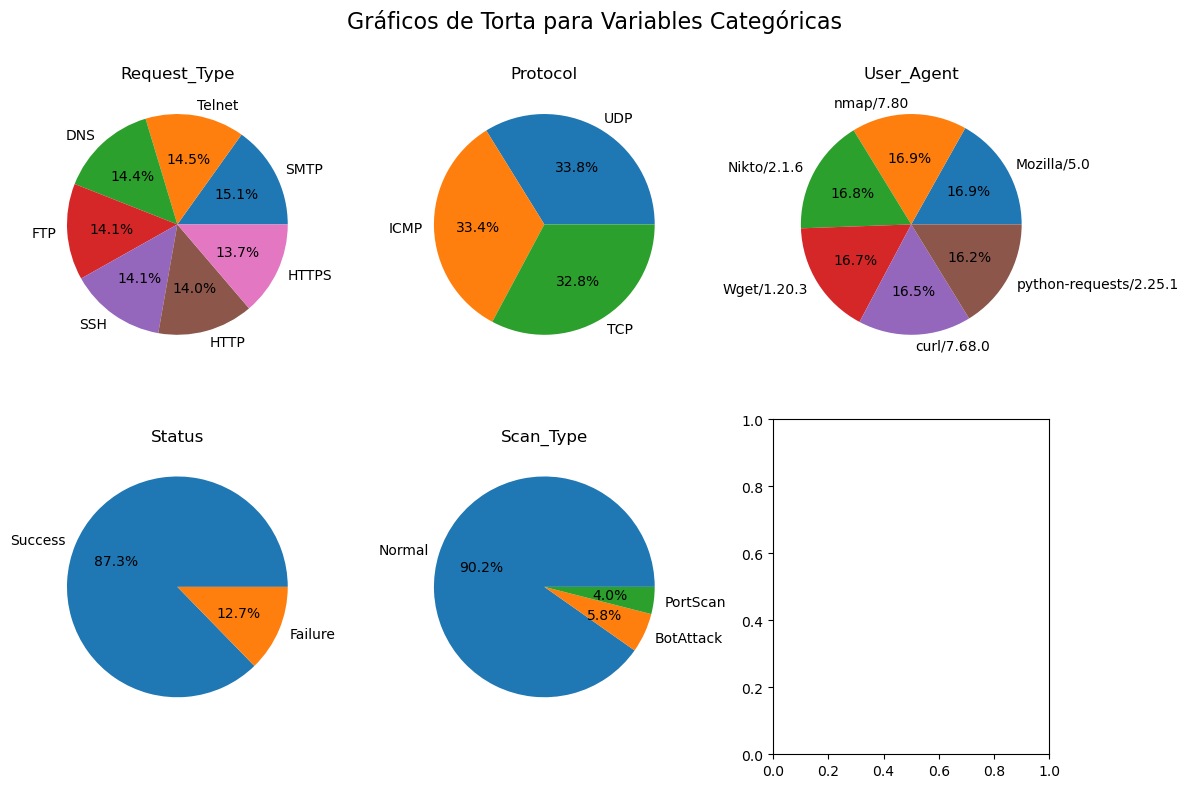

In [13]:
fig, ax = plt.subplots(2 , 3 , figsize=(12,8))
ax =ax.flat
cat_col = data.select_dtypes(include='object').columns
cat_col = cat_col.drop(['Timestamp', 'Source_IP', 'Destination_IP'])  # Excluir columnas no categóricas
for i, col in enumerate(cat_col):
    ax[i].pie(x = data[col].value_counts(),
            labels = data[col].value_counts().index,
            autopct = '%.1f%%')
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top=0.92)
fig.suptitle('Gráficos de Torta para Variables Categóricas', fontsize=16)
plt.show()

**ANÁLISIS**

Las variables `Status` y `Scan_Type` se encuentran desbalanceadas, ambas poseen dos valores con más del 80%

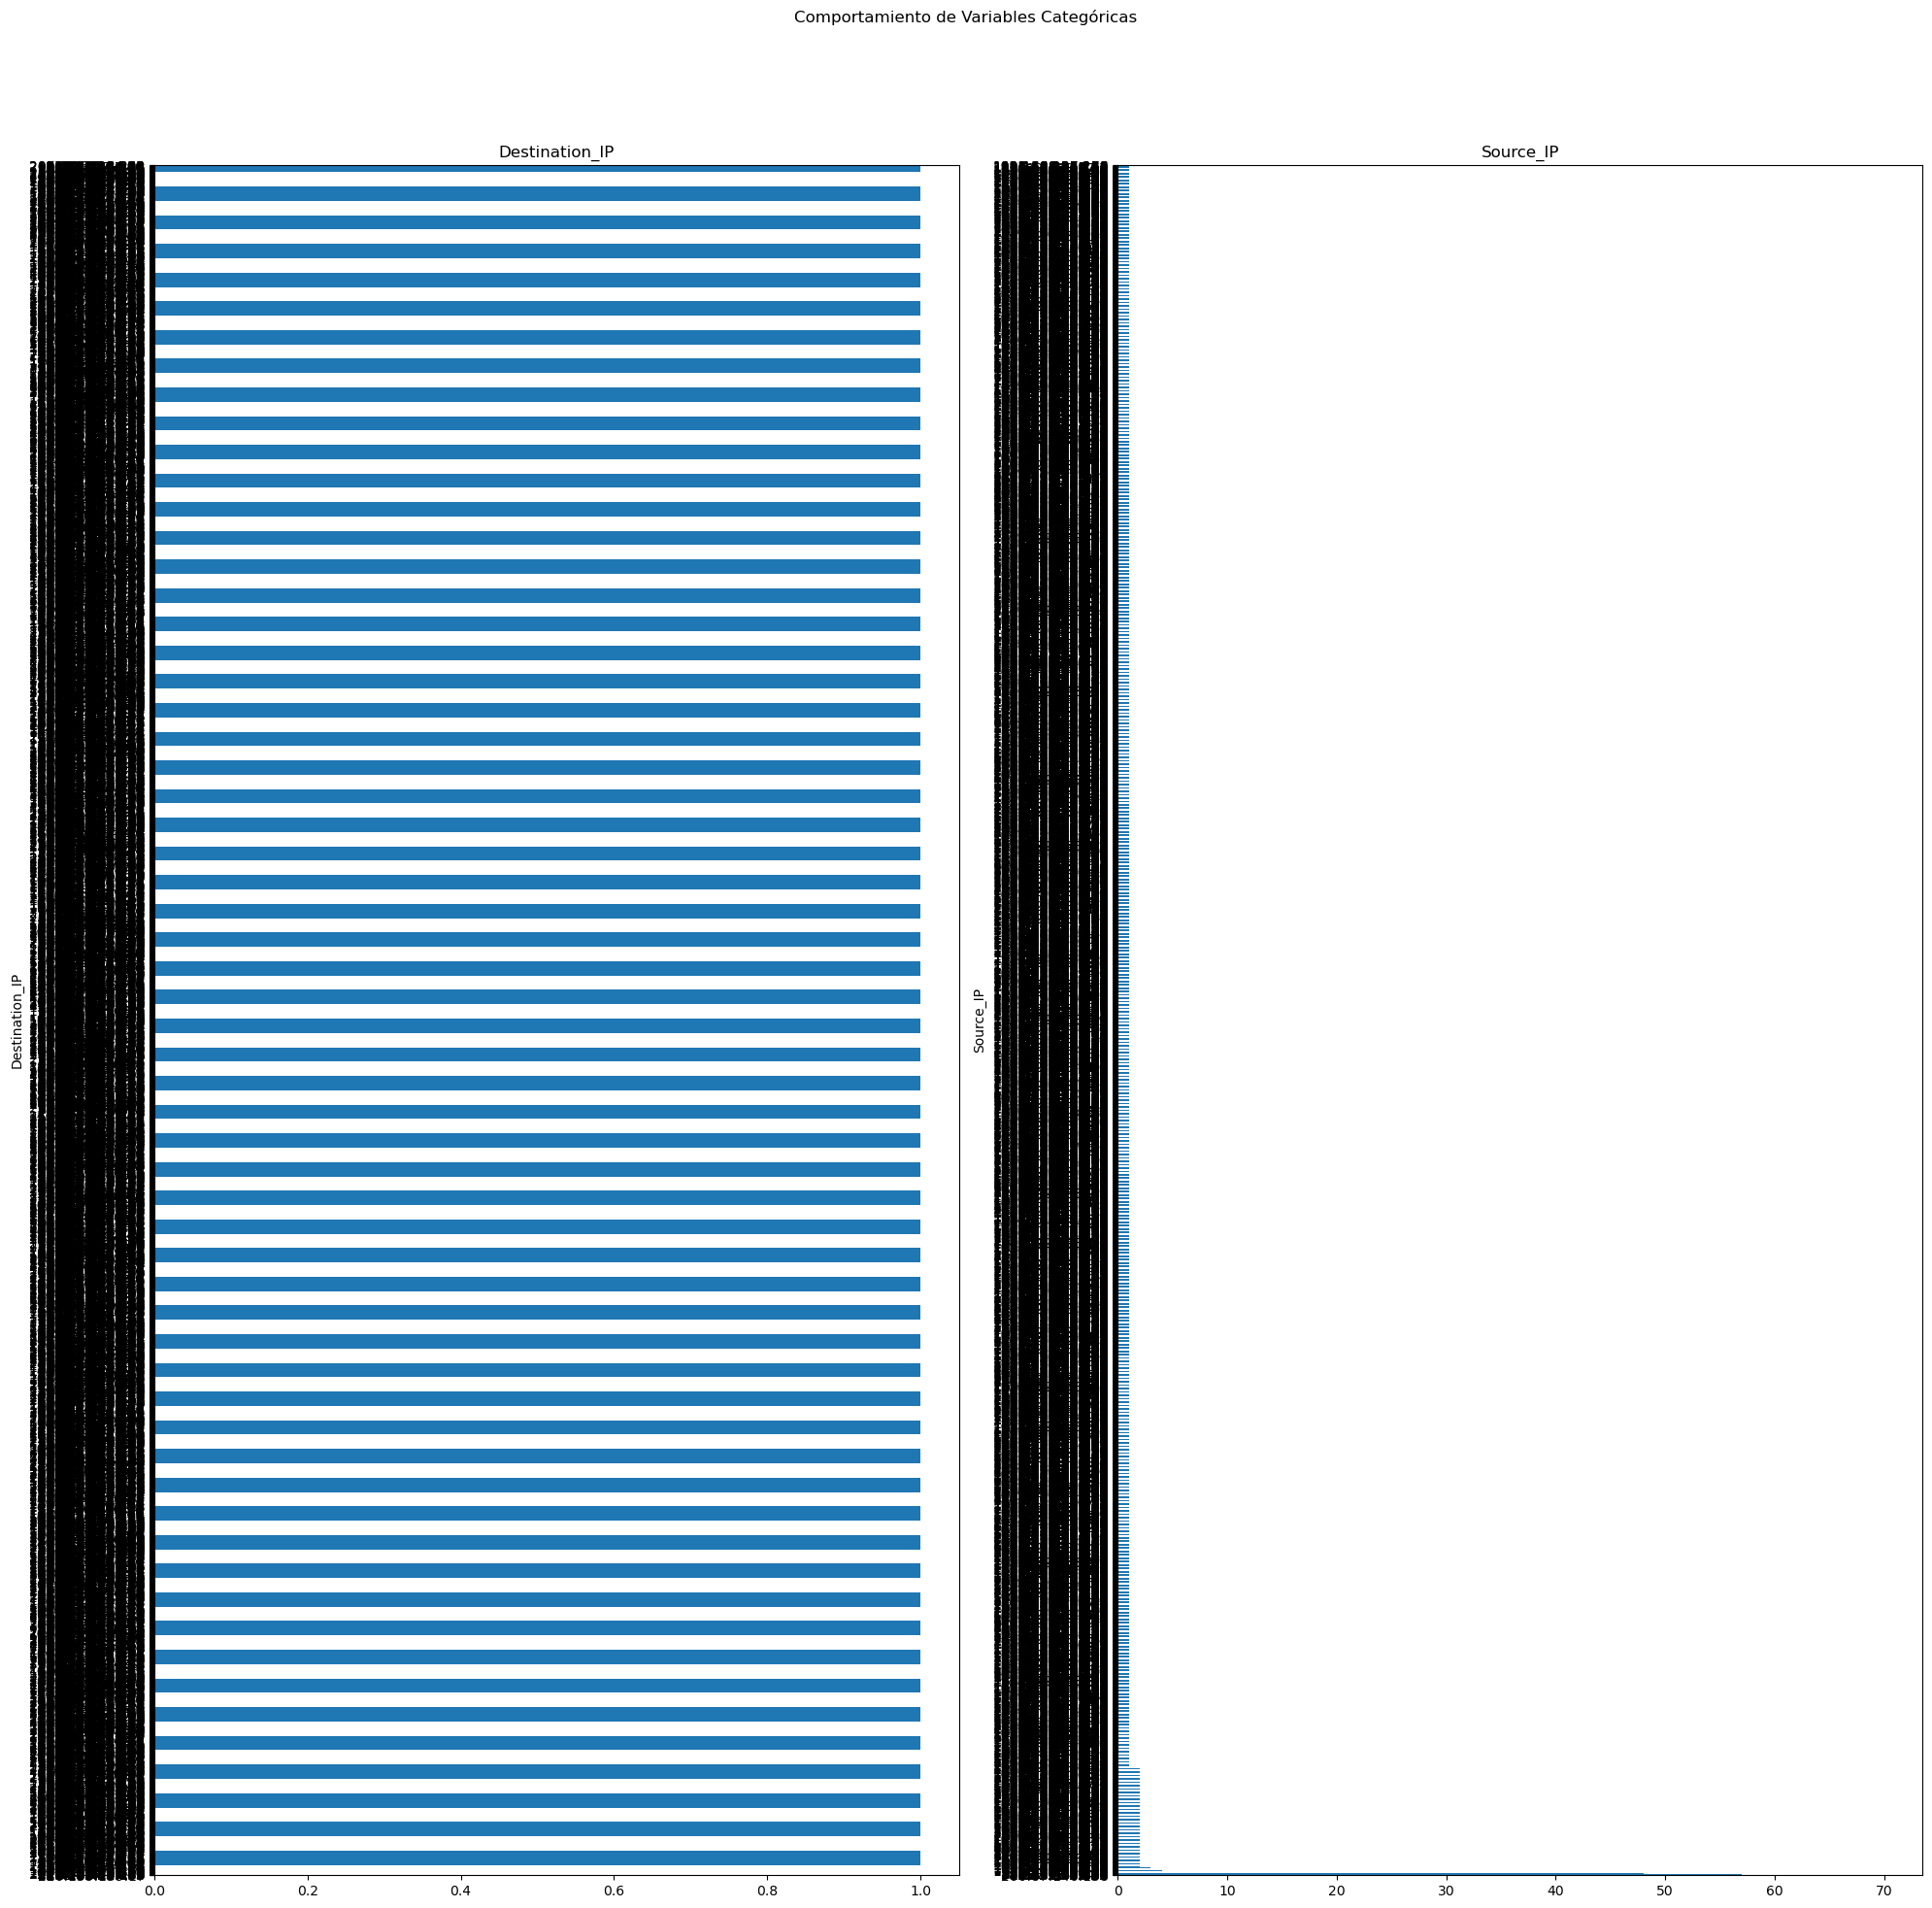

In [14]:
##Gráfico de barras para variables categóricas
fig, ax = plt.subplots(1, 2, figsize = (20, 20))
ax = ax.flat

col = data[['Destination_IP', 'Source_IP']]
for i, col in enumerate(col):
    data[col].value_counts().plot.barh(ax = ax[i])
    ax[i].set_title(col)

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Comportamiento de Variables Categóricas')
plt.show()

## Preparación de los Datos

### Limpieza de los Datos

In [5]:
data_mod = data.drop(columns=['Port', 'Source_IP', 'Destination_IP'])
data_mod

,Timestamp,Request_Type,Protocol,Payload_Size,User_Agent,Status,Intrusion,Scan_Type
0,2025-06-06 06:04:08,SSH,ICMP,2954,Mozilla/5.0,Success,0,Normal
1,2025-06-04 15:20:59,FTP,UDP,206,Wget/1.20.3,Success,0,Normal
2,2025-06-03 07:23:49,SSH,ICMP,977,nmap/7.80,Success,0,Normal
3,2025-06-03 11:35:42,HTTP,TCP,521,curl/7.68.0,Success,0,Normal
4,2025-06-05 06:09:02,Telnet,TCP,251,Wget/1.20.3,Success,0,Normal
...,...,...,...,...,...,...,...,...
8861,2025-06-04 22:16:23,DNS,ICMP,1391,Nikto/2.1.6,Failure,1,BotAttack
8862,2025-06-05 14:43:42,SSH,TCP,2272,curl/7.68.0,Success,0,Normal
8863,2025-06-01 23:27:15,SSH,TCP,2753,python-requests/2.25.1,Success,0,Normal
8864,2025-06-01 00:26:36,DNS,TCP,2792,nmap/7.80,Success,0,Normal


<Axes: ylabel='Days,Months'>

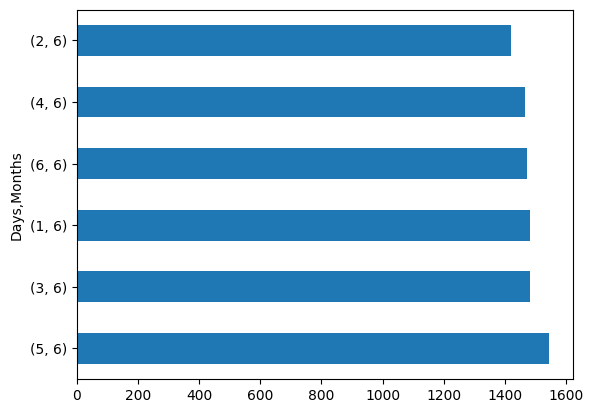

In [6]:
data_mod['Timestamp'] = pd.to_datetime(data_mod['Timestamp'], errors='raise')
data_mod['Months'] = data_mod['Timestamp'].dt.month
data_mod['Days'] = data_mod['Timestamp'].dt.day
data_mod[['Days', 'Months']].value_counts().plot.barh()

In [7]:
data_clean = data_mod.drop(columns=['Timestamp', 'Days', 'Months'])
data_clean

,Request_Type,Protocol,Payload_Size,User_Agent,Status,Intrusion,Scan_Type
0,SSH,ICMP,2954,Mozilla/5.0,Success,0,Normal
1,FTP,UDP,206,Wget/1.20.3,Success,0,Normal
2,SSH,ICMP,977,nmap/7.80,Success,0,Normal
3,HTTP,TCP,521,curl/7.68.0,Success,0,Normal
4,Telnet,TCP,251,Wget/1.20.3,Success,0,Normal
...,...,...,...,...,...,...,...
8861,DNS,ICMP,1391,Nikto/2.1.6,Failure,1,BotAttack
8862,SSH,TCP,2272,curl/7.68.0,Success,0,Normal
8863,SSH,TCP,2753,python-requests/2.25.1,Success,0,Normal
8864,DNS,TCP,2792,nmap/7.80,Success,0,Normal


In [8]:
data_status = data_clean.drop(columns=['Scan_Type'])
data_intrusion = data_clean.drop(columns=['Status', 'Scan_Type'])

### Balanceo

#### Y: Intrusion

In [11]:
data_intrusion["Intrusion"].value_counts()

Intrusion
0    8000
1     866
Name: count, dtype: int64

In [12]:
data_intrusion_intrusion = data_intrusion[data_intrusion["Intrusion"] == 1]
data_intrusion_no_intrusion = data_intrusion[data_intrusion["Intrusion"] == 0]

print(f"Intrusion: {data_intrusion_intrusion.shape[0]}")
print(f"No Intrusion: {data_intrusion_no_intrusion.shape[0]}")

Intrusion: 866
No Intrusion: 8000


In [13]:
data_intrusion_re = data_intrusion_intrusion.sample(data_intrusion_no_intrusion.shape[0], replace=True)

data_intrusion = pd.concat([data_intrusion_no_intrusion, data_intrusion_re])
data_intrusion.reset_index(drop=True, inplace=True)
data_intrusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Request_Type  16000 non-null  object
 1   Protocol      16000 non-null  object
 2   Payload_Size  16000 non-null  int64 
 3   User_Agent    16000 non-null  object
 4   Intrusion     16000 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 625.1+ KB


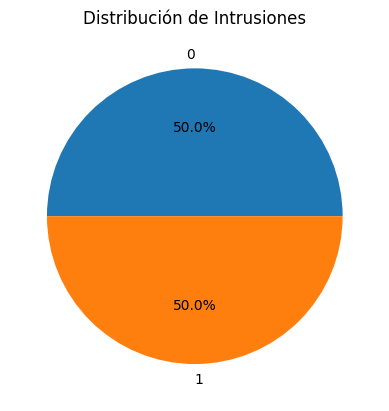

In [14]:
plt.pie(data_intrusion["Intrusion"].value_counts(), labels=data_intrusion["Intrusion"].value_counts().index, autopct='%1.1f%%')
plt.title("Distribución de Intrusiones")
plt.show()

## Y: Intrusion

### Transformación de los Datos

In [15]:
X = data_intrusion.drop(columns=['Intrusion'])
y = data_intrusion['Intrusion']

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (16000, 4)
y shape: (16000,)


In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

In [17]:
num_col = X.select_dtypes(include=['int64', 'float64']).columns
cat_col = X.select_dtypes(include='object').columns

preprocessor = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), num_col),
    ('cat', OneHotEncoder(sparse_output=True, handle_unknown="ignore"), cat_col)],
    remainder='passthrough',
    sparse_threshold=0.0
)

preprocessor

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.0
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,feature_range,"(0, ...)"
,copy,True
,clip,False


In [18]:
X_pre = preprocessor.fit_transform(X)
cod_cat = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_col)
labels = np.concatenate((num_col, cod_cat))
X_pro = pd.DataFrame(X_pre, columns=labels)
X_pro

,Payload_Size,Request_Type_DNS,Request_Type_FTP,Request_Type_HTTP,Request_Type_HTTPS,Request_Type_SMTP,Request_Type_SSH,Request_Type_Telnet,Protocol_ICMP,Protocol_TCP,Protocol_UDP,User_Agent_Mozilla/5.0,User_Agent_Nikto/2.1.6,User_Agent_Wget/1.20.3,User_Agent_curl/7.68.0,User_Agent_nmap/7.80,User_Agent_python-requests/2.25.1
0,0.591865,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.041274,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.195752,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.104388,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.050291,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0.309357,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15996,0.541775,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15997,0.403326,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
15998,0.011220,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### Conjunto de Entrenamiento

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_pro, y, train_size=0.9, random_state=123)

print(f'El Tamaño de X_train es: {X_train.shape}')
print(f'El Tamaño de X_test es: {X_test.shape}')
print(f'El Tamaño de y_train es: {y_train.shape}')
print(f'El Tamaño de y_test es: {y_test.shape}')

El Tamaño de X_train es: (14400, 17)
El Tamaño de X_test es: (1600, 17)
El Tamaño de y_train es: (14400,)
El Tamaño de y_test es: (1600,)


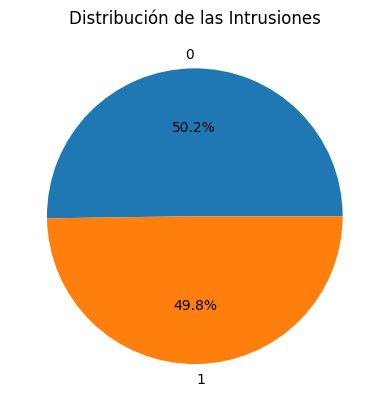

In [21]:
plt.pie(y_train.value_counts(), labels=y_train.value_counts().index, autopct='%1.1f%%')
plt.title("Distribución de las Intrusiones")
plt.show()

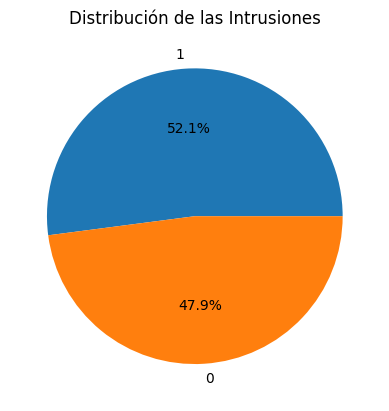

In [22]:
plt.pie(y_test.value_counts(), labels=y_test.value_counts().index, autopct='%1.1f%%')
plt.title("Distribución de las Intrusiones")
plt.show()

### Modelos Y:Intrusion

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

#### Regresión Logística

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
modelo_1 = LogisticRegression(solver='saga', random_state=123)
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'], "C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
clf_1 = GridSearchCV(estimator=modelo_1, param_grid=param_grid, cv=5, scoring='f1_weighted')
clf_1.fit(X_train, y_train)

,estimator,LogisticRegre...solver='saga')
,param_grid,"{'C': [0.0001, 0.001, ...], 'penalty': ['l1', 'l2', ...]}"
,scoring,'f1_weighted'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [26]:
validation = pd.concat([pd.DataFrame(clf_1.cv_results_['params']), 
                        pd.DataFrame(clf_1.cv_results_['mean_test_score'], columns=['f1'])],
                       axis=1)
validation.sort_values(by='f1', ascending=False)

,C,penalty,f1
9,0.1000,l1,0.527938
4,0.0010,l2,0.526796
7,0.0100,l2,0.525215
15,10.0000,l1,0.523785
16,10.0000,l2,0.523778
18,100.0000,l1,0.523778
19,100.0000,l2,0.523778
21,1000.0000,l1,0.523778
22,1000.0000,l2,0.523778
10,0.1000,l2,0.523711


In [27]:
modelo_1_final = clf_1.best_estimator_
modelo_1_final

,penalty,'l1'
,dual,False
,tol,0.0001
,C,0.1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,123
,solver,'saga'
,max_iter,100
,multi_class,'deprecated'


Metricas de Entrenamiento
              precision    recall  f1-score   support

           0       0.54      0.53      0.53      7233
           1       0.53      0.54      0.54      7167

    accuracy                           0.53     14400
   macro avg       0.53      0.53      0.53     14400
weighted avg       0.53      0.53      0.53     14400

Matriz de Confusion


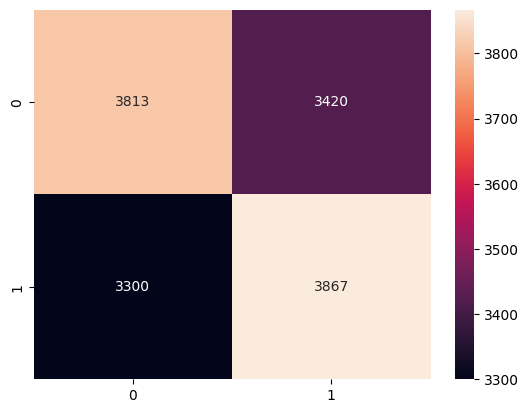

In [28]:
y_pred_1_train = modelo_1_final.predict(X_train)
print("Metricas de Entrenamiento")
print(classification_report(y_train, y_pred_1_train))
print("Matriz de Confusion")
sns.heatmap(confusion_matrix(y_train, y_pred_1_train), annot=True, fmt='d')
plt.show()

Metricas de Prueba
              precision    recall  f1-score   support

           0       0.52      0.54      0.53       767
           1       0.56      0.53      0.55       833

    accuracy                           0.54      1600
   macro avg       0.54      0.54      0.54      1600
weighted avg       0.54      0.54      0.54      1600

Matriz de Confusion


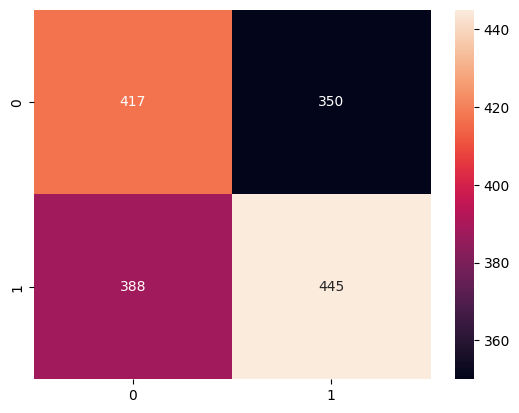

In [29]:
y_pred_1_test = modelo_1_final.predict(X_test)
print("Metricas de Prueba")
print(classification_report(y_test, y_pred_1_test))
print("Matriz de Confusion")
sns.heatmap(confusion_matrix(y_test, y_pred_1_test), annot=True, fmt='d')
plt.show()

#### K Vecinos Mas Cercanos

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
modelo_2 = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 17, 21, 37], "p": [1, 2]}
clf_2 = GridSearchCV(estimator=modelo_2, param_grid=param_grid, cv=5, scoring="f1_weighted")
clf_2.fit(X_train, y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [3, 5, ...], 'p': [1, 2]}"
,scoring,'f1_weighted'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,3


In [32]:
validation = pd.concat([pd.DataFrame(clf_2.cv_results_['params']),
                        pd.DataFrame(clf_2.cv_results_['mean_test_score'], columns=['f1_weighted'])],
                        axis=1)
validation

,n_neighbors,p,f1_weighted
0,3,1,0.942555
1,3,2,0.942625
2,5,1,0.913001
3,5,2,0.912860
4,7,1,0.880359
5,7,2,0.880502
6,9,1,0.848850
7,9,2,0.848707
8,11,1,0.824000
9,11,2,0.824143


In [33]:
modelo_2_final = clf_2.best_estimator_
modelo_2_final

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Metricas de Entrenamiento
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      7233
           1       0.96      1.00      0.98      7167

    accuracy                           0.98     14400
   macro avg       0.98      0.98      0.98     14400
weighted avg       0.98      0.98      0.98     14400

Matriz de Confusion


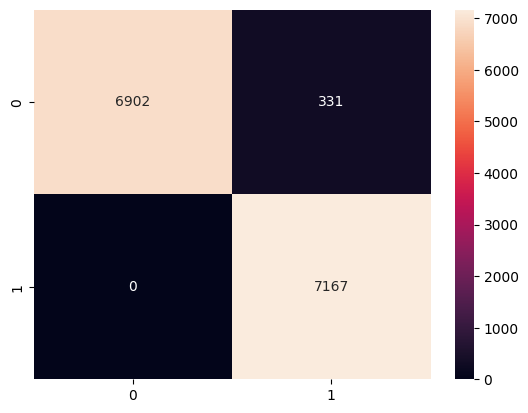

In [34]:
y_pred_2_train = modelo_2_final.predict(X_train)
print("Metricas de Entrenamiento")
print(classification_report(y_train, y_pred_2_train))
print("Matriz de Confusion")
sns.heatmap(confusion_matrix(y_train, y_pred_2_train), annot=True, fmt='d')
plt.show()

Metricas de Prueba
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       767
           1       0.92      1.00      0.96       833

    accuracy                           0.95      1600
   macro avg       0.96      0.95      0.95      1600
weighted avg       0.96      0.95      0.95      1600

Matriz de Confusion


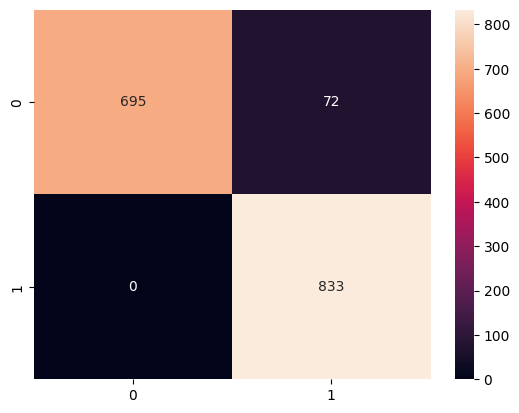

In [35]:
y_pred_2_test = modelo_2_final.predict(X_test)
print("Metricas de Prueba")
print(classification_report(y_test, y_pred_2_test))
print("Matriz de Confusion")
sns.heatmap(confusion_matrix(y_test, y_pred_2_test), annot=True, fmt='d')
plt.show()

#### Árboles de Decisión

In [36]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [37]:
modelo_4 = DecisionTreeClassifier(random_state=123)
param_grid = {'criterion': ['log_loss', 'gini', 'entropy'], 'max_depth':[None, 5, 10, 15, 20], 'max_leaf_nodes':[None, 5, 10, 15, 20],
'min_samples_split': [2, 3, 4]}
clf_4 = GridSearchCV(estimator=modelo_4, param_grid=param_grid, cv=5, scoring="f1_weighted")
clf_4.fit(X_train, y_train)

,estimator,DecisionTreeC...dom_state=123)
,param_grid,"{'criterion': ['log_loss', 'gini', ...], 'max_depth': [None, 5, ...], 'max_leaf_nodes': [None, 5, ...], 'min_samples_split': [2, 3, ...]}"
,scoring,'f1_weighted'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [38]:
validation = pd.concat([pd.DataFrame(clf_4.cv_results_['params']), 
                        pd.DataFrame(clf_4.cv_results_['mean_test_score'], columns=['f1'])],
                       axis=1)
validation.sort_values(by='f1', ascending=False)

,criterion,max_depth,max_leaf_nodes,min_samples_split,f1
75,gini,NaN,NaN,2,0.974291
76,gini,NaN,NaN,3,0.973388
77,gini,NaN,NaN,4,0.973041
0,log_loss,NaN,NaN,2,0.973037
150,entropy,NaN,NaN,2,0.973037
...,...,...,...,...,...
50,log_loss,15.0,5.0,4,0.825424
198,entropy,15.0,5.0,2,0.825424
199,entropy,15.0,5.0,3,0.825424
200,entropy,15.0,5.0,4,0.825424


Profundidad del árbol: 38
 Número de hojas: 716


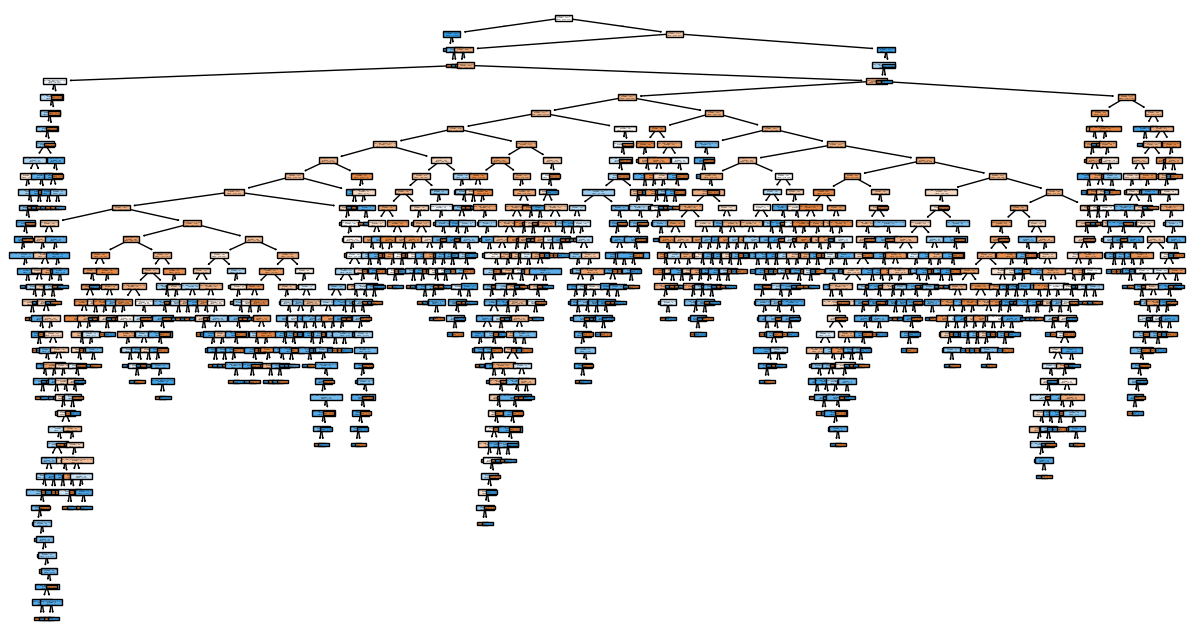

In [39]:
modelo_4_final = clf_4.best_estimator_
fig, ax = plt.subplots(figsize=(15, 8))
print(f"Profundidad del árbol: {modelo_4_final.get_depth()}\n Número de hojas: {modelo_4_final.get_n_leaves()}")
plot = plot_tree(modelo_4_final, feature_names=labels, filled=True, impurity=False, ax=ax)

Metricas de Entrenamiento
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7233
           1       1.00      1.00      1.00      7167

    accuracy                           1.00     14400
   macro avg       1.00      1.00      1.00     14400
weighted avg       1.00      1.00      1.00     14400

Matriz de Confusion


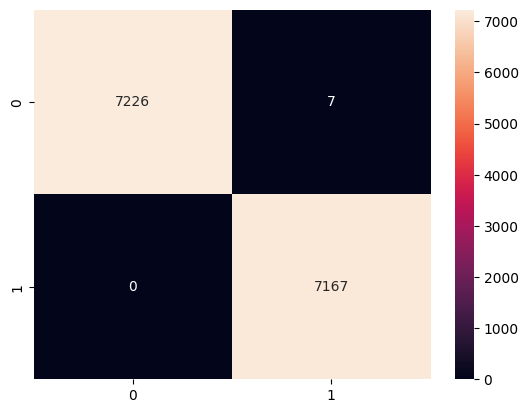

In [40]:
y_pred_4_train = modelo_4_final.predict(X_train)
print("Metricas de Entrenamiento")
print(classification_report(y_train, y_pred_4_train))
print("Matriz de Confusion")
sns.heatmap(confusion_matrix(y_train, y_pred_4_train), annot=True, fmt='d')
plt.show()

Metricas de Prueba
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       767
           1       0.96      1.00      0.98       833

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600

Matriz de Confusion


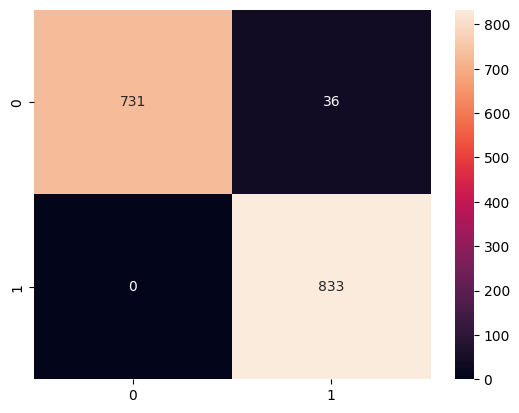

In [41]:
y_pred_4_test = modelo_4_final.predict(X_test)
print("Metricas de Prueba")
print(classification_report(y_test, y_pred_4_test))
print("Matriz de Confusion")
sns.heatmap(confusion_matrix(y_test, y_pred_4_test), annot=True, fmt='d')
plt.show()

### Conclusiones

Con respecto a los modelos evaluados pudimos determinar que Regresión Logística y Máquinas de Soporte Vectorial no se consideran debido a su bajo accuracy en el **f1-score** con 0.55 y 0.76 respectivamente, lo que es un mal indicador y ni si quiera superan el requisito del 80%. Por otro lado, los modelos de K Vecinos Mas Cercanos y Árboles de decisión retornaron una valoración muy alta con 0.96 y 0.98. Finalmente, decidimos quedarnos con los Árboles de Decisión que representaron la mejor valoración para la solución de nuestro problema

In [42]:
import joblib

joblib.dump(modelo_4_final, '../models/decisiontree.pkl')
joblib.dump(modelo_2_final, '../models/kneighbors.pkl')

['../models/kneighbors.pkl']